# Tabla de Contenido

<a id='tabla'></a>

* [1.1 Análisis exploratorio de datos (EDA).](#as1)
     * [1.1.1.Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar](#as2)
     * [1.1.2.Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron.](#as3)
     * [1.1.3.Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.](#as4)
     * [1.1.4.Crea una matriz de correlación y muéstrala.](#as5)
* [2.1 Construir un modelo para predecir la cancelación de usuarios.](#as6)
     * [2.1.1.Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().](#as7)
     * [2.1.2.Entrena el modelo en el set de entrenamiento con dos métodos: Regresión logística y Bosque aleatorio.](#as8)
     * [2.1.3.Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?.](#as9)
* [3.1 Construir un modelo para predecir la cancelación de usuarios](#as10)
     * [3.1.1.Estandariza los datos. Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.](#as11)
     * [3.1.2. Mira los valores medios de característica para los clústeres.](#as12)
     * [3.1.3. ¿Hay algo que te llame la atención? Traza distribuciones de características para los clústeres. ¿Notas algo?.](#as13)
     * [3.1.4. Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?.](#as14)
* [4.1 Conclusiones y recomendaciones.](#as15)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans


In [2]:
# Leer los archivos CSV y asignarles nombres

gym_data = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-13/gym_churn_us.csv')  # Nuevo nombre para este archivo


## 1.1 Análisis exploratorio de datos (EDA)]

In [3]:
display(gym_data)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
# Lista para almacenar los nuevos nombres de columnas de Data Frame orders_us

new_columns = []

# Iterar sobre las columnas actuales
for col in gym_data.columns:
    # Convertir a minúsculas y reemplazar espacios por guiones bajos
    new_col = col.lower().replace(' ', '_')
    new_columns.append(new_col)

# Asignar los nuevos nombres al DataFrame
gym_data.columns = new_columns

# Mostrar las columnas actualizadas
display(gym_data.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [5]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
# Verificar valores ausentes
display(gym_data.isnull().sum())

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
gym_data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
print(gym_data.duplicated().sum())

0


In [9]:
# Numero de Filas y Columnas
print(gym_data.shape)

(4000, 14)


#### 1.1.1. Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [10]:
display(gym_data.describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Algunas Observaciones Importantes:

- No se observan caracteristicas ausentes.
- Cantidad de dinero gastado en promedio es de 146.94, en servicios dentro del gimnasio.
- Un promedio 84% de los clientes viven cerca del gimnasio.
- Un promedio 26% total de abandono de clientes del gimnasio.
- Periodo máximo de servicio contrado, es de 12 meses y periodo mínimo es de 1 mes.


#### 1.1.2 Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron.


In [11]:
# Calcular los valores medios para cada grupo (churn=0 y churn=1)
mean_values = gym_data.groupby('churn').mean()

# Mostrar los resultados
display(mean_values)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### 1.1.3 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [12]:
# Contar la cantidad de clientes en cada grupo de churn
churn_counts = gym_data['churn'].value_counts()
print(churn_counts)

churn
0    2939
1    1061
Name: count, dtype: int64


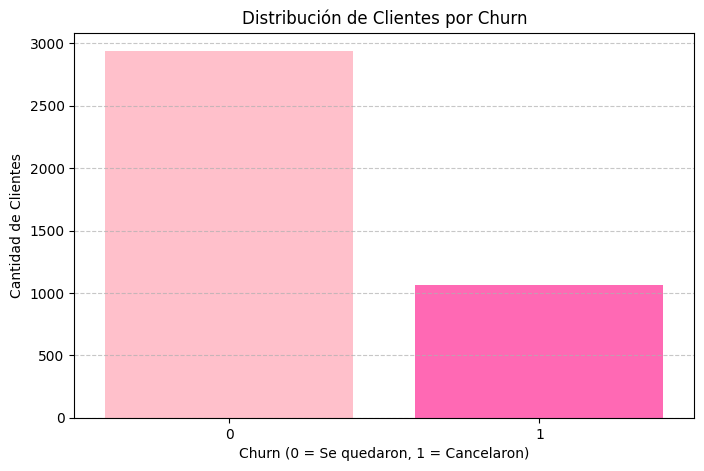

In [13]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values)

# Asignar colores manualmente a cada barra
colors = ['pink', 'hotpink']
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

# Personalizar el gráfico
plt.title("Distribución de Clientes por Churn")
plt.xlabel("Churn (0 = Se quedaron, 1 = Cancelaron)")
plt.ylabel("Cantidad de Clientes")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

In [14]:
caract_gym = gym_data.copy()

# Filtrando campos churn y age 

caract_gym = gym_data[['churn','age']]


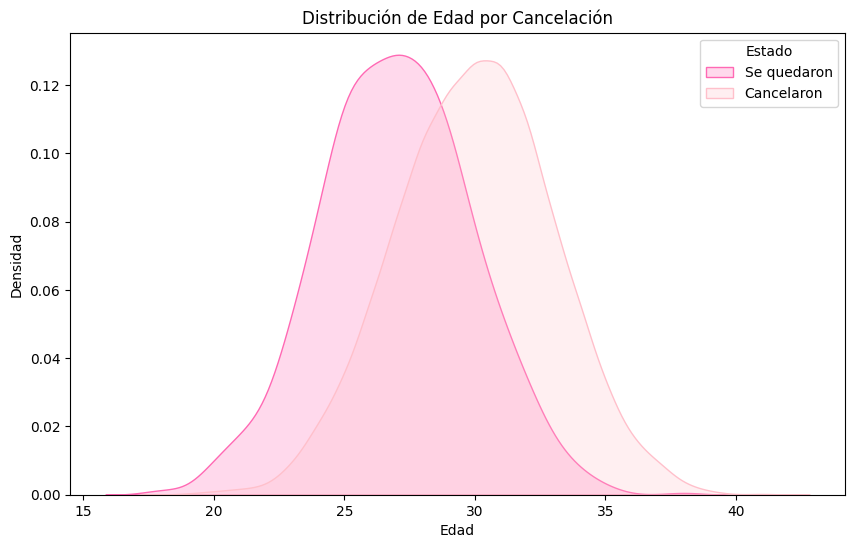

In [15]:
# Crear un gráfico de densidad para comparar las edades de los dos grupos
plt.figure(figsize=(10, 6))

# Usar seaborn para trazar la distribución de las edades, separada por grupo
sns.kdeplot(data=caract_gym, x='age', hue='churn', fill=True, common_norm=False,palette=['pink', 'hotpink'])

# Añadir título y etiquetas
plt.title('Distribución de Edad por Cancelación')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Personalizar los nombres de las leyendas
plt.legend(title='Estado', labels=['Se quedaron', 'Cancelaron'])


# Mostrar el gráfico
plt.show()

#### Distribución de cada característica para cada grupo

- Verificar si hay diferencias notables entre los grupos.

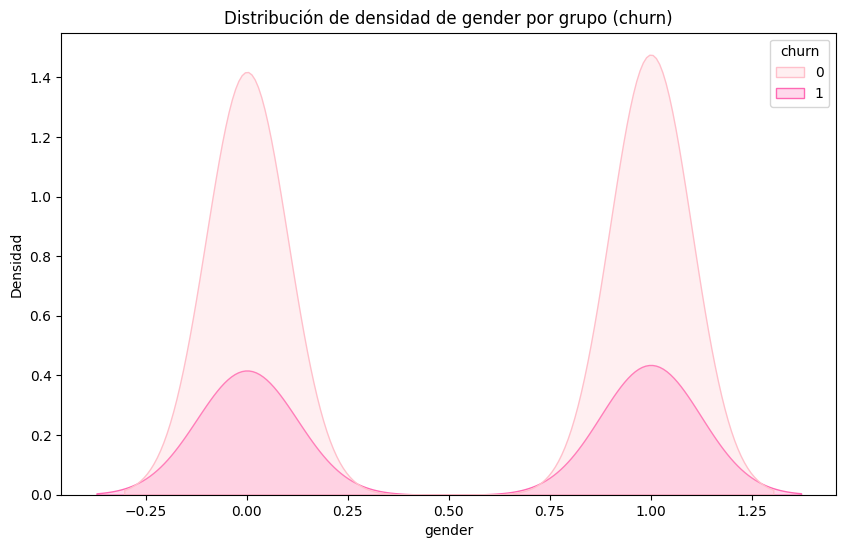

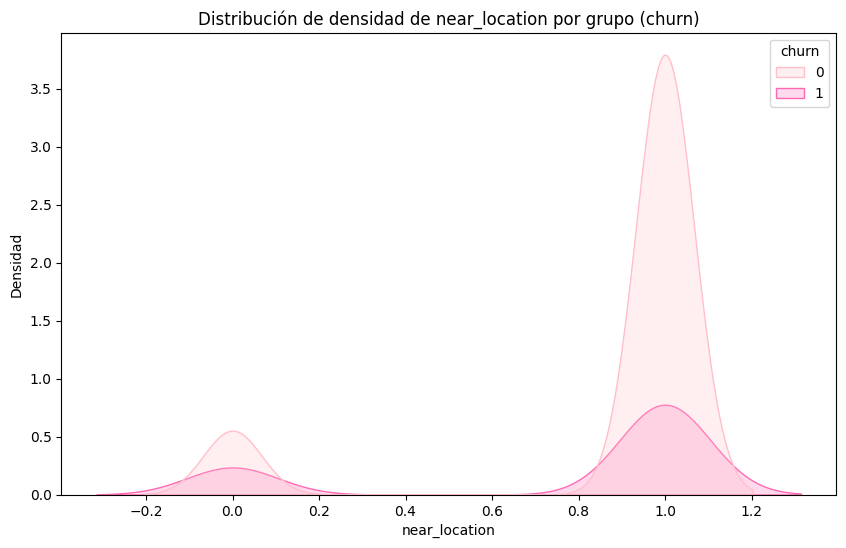

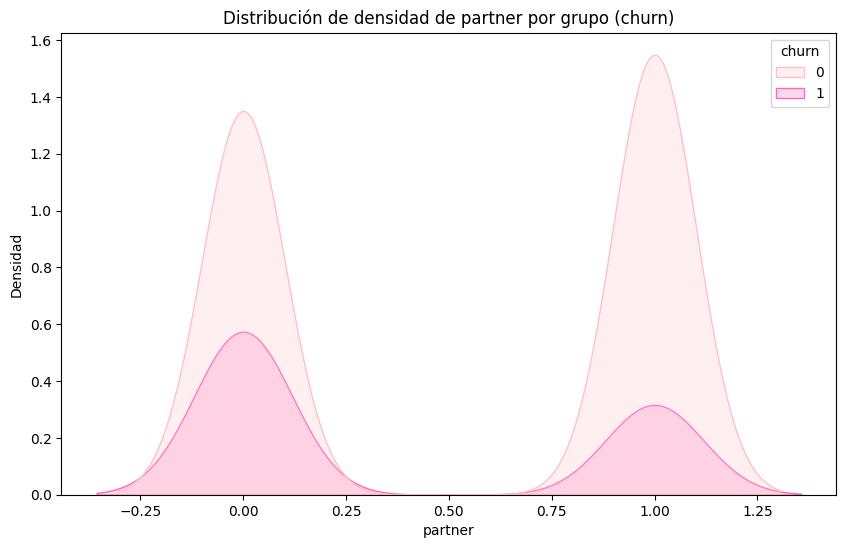

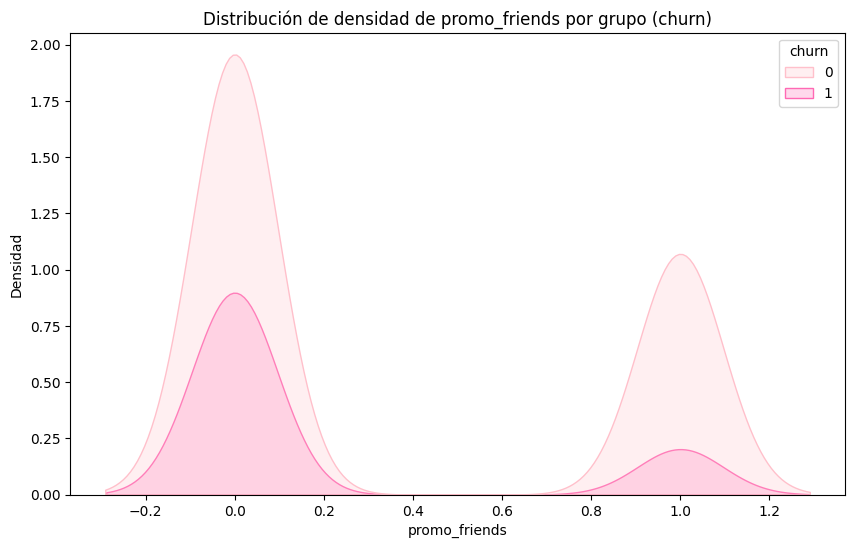

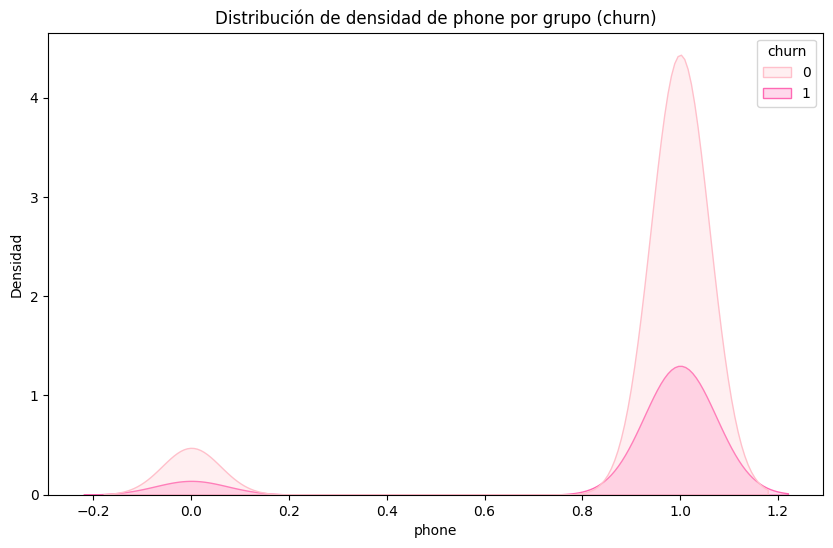

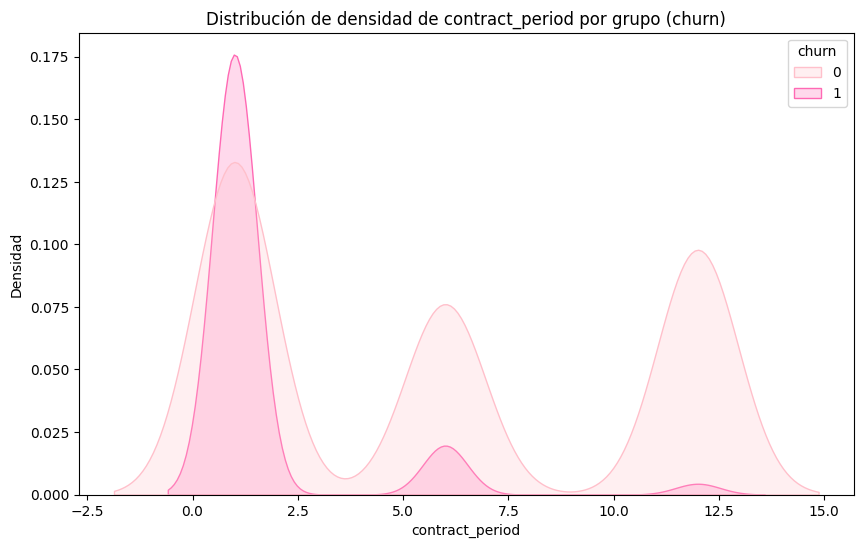

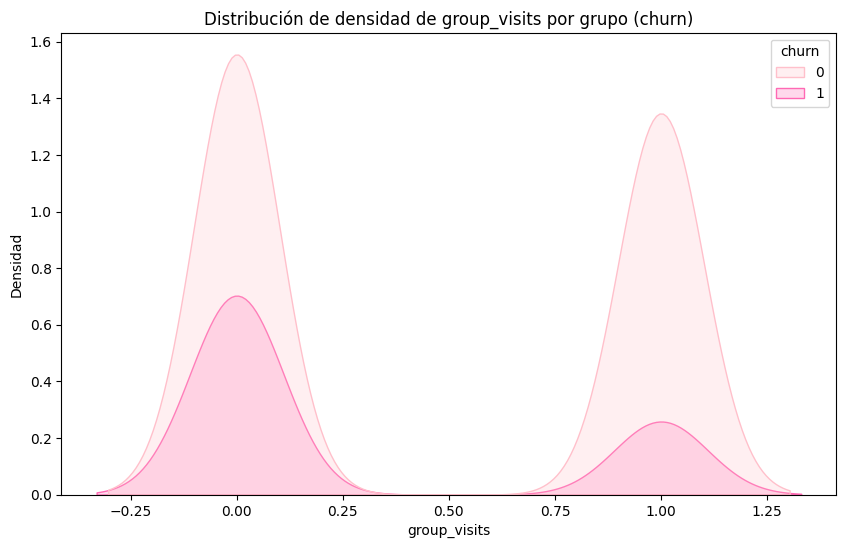

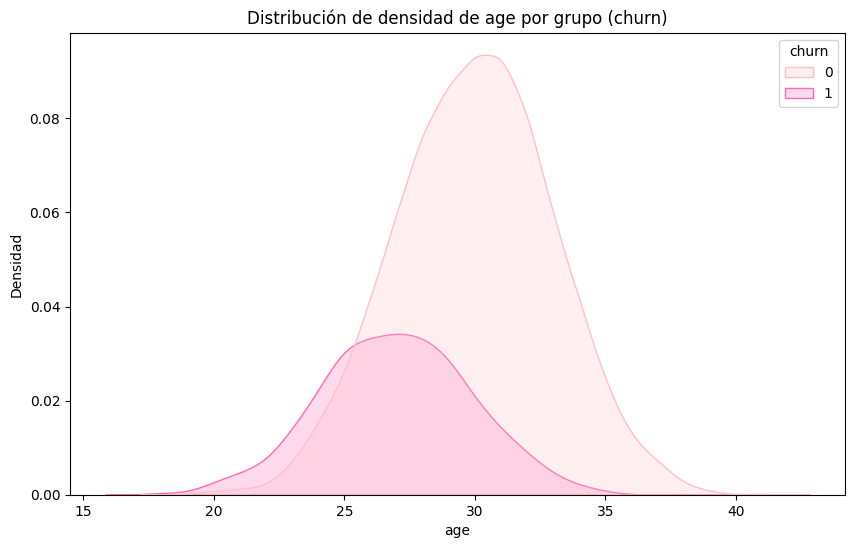

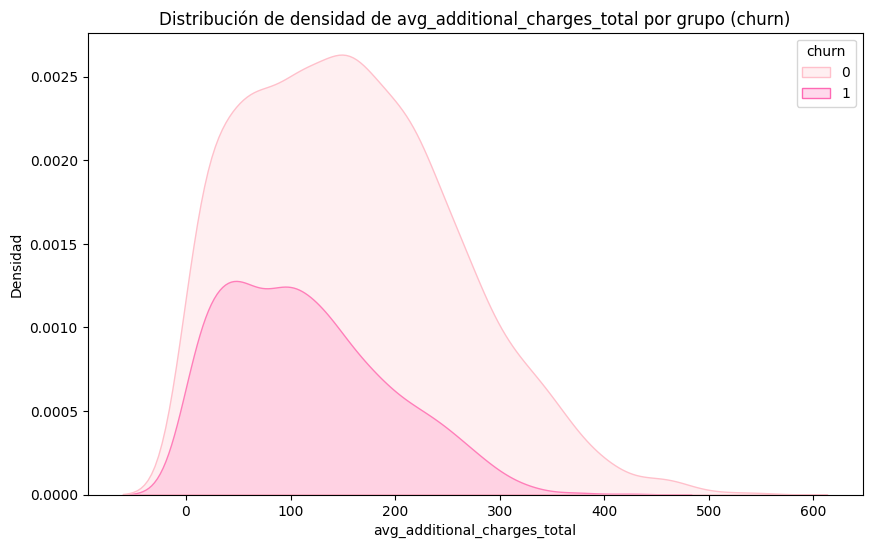

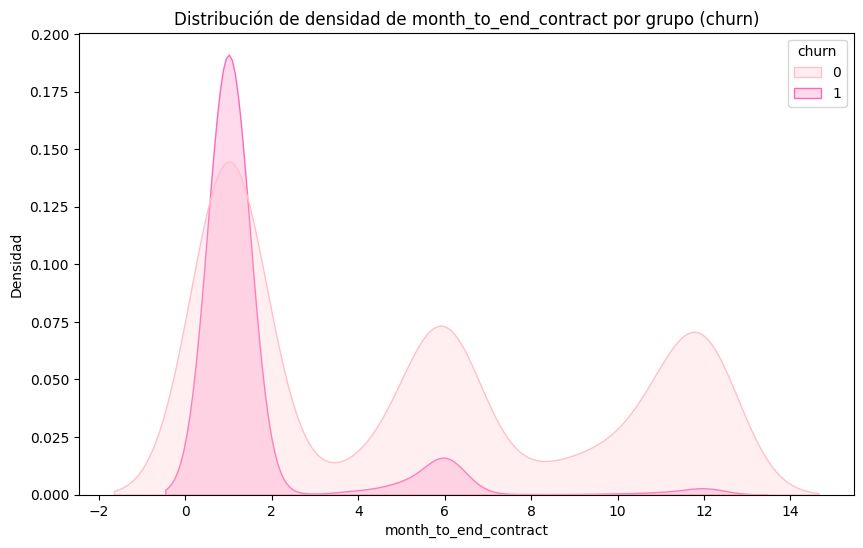

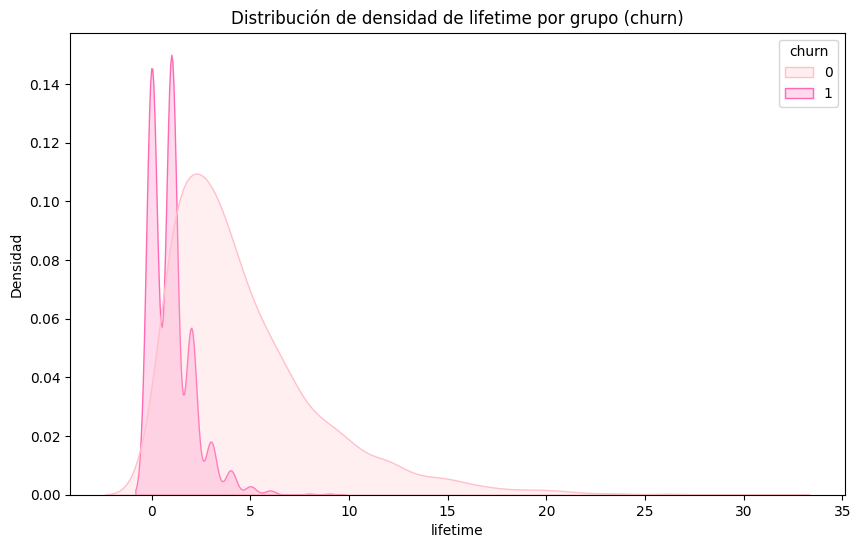

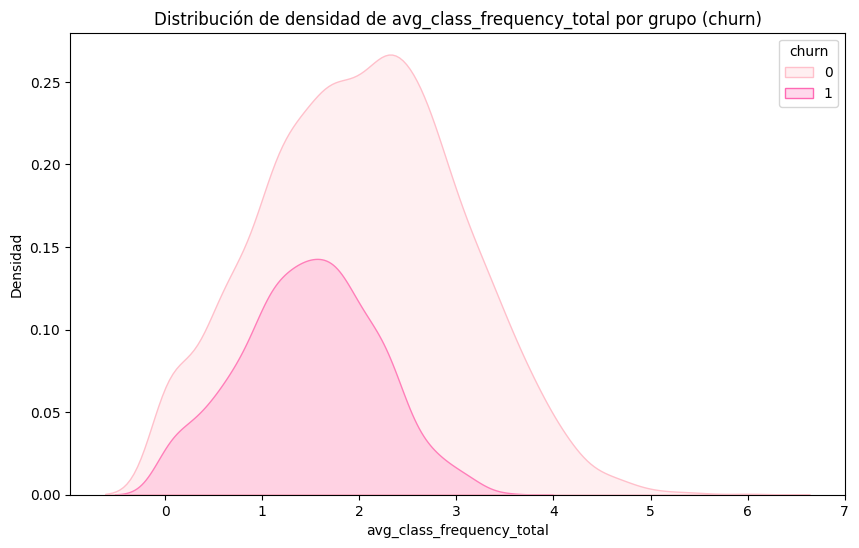

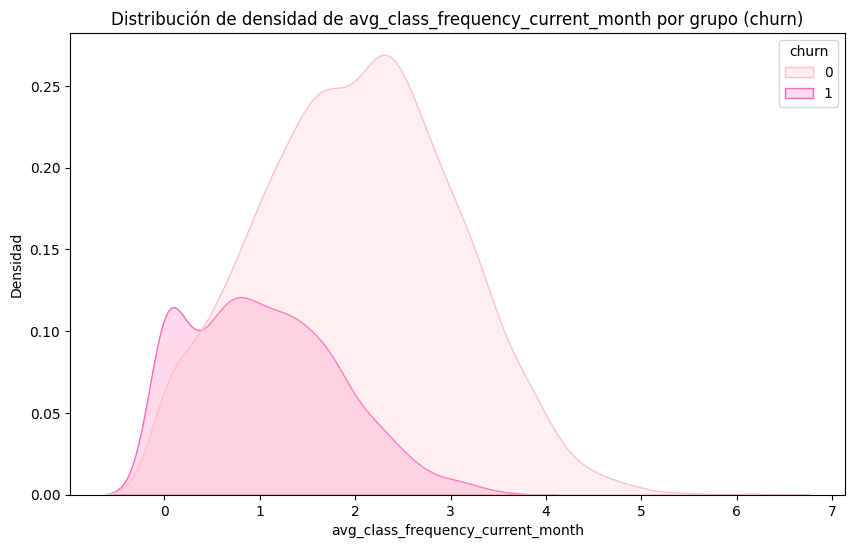

In [16]:
for col in gym_data.drop('churn', axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=gym_data, x=col, hue='churn', fill=True, palette=['pink', 'hotpink'])
    plt.title(f'Distribución de densidad de {col} por grupo (churn)')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()

- "gender", si existe una gran similitud en ambos.
- "near_location", si existen diferencias signficativas, el abandono es menor.
- "parther", si existen diferencias signficativas, el abandono es menor.
- "promo_friends", si existen diferencias signficativas, el abandono es menor.
- "phone", si existen diferencias signficativas, el abandono es menor.
- "contract_period", si existen diferencias signficativas, el abandono es mayor, unicamente en los clientes que tienen menos de 3 meses.
- "group_visits", si existen diferencias signficativas, el abandono es menor.
- "age", si existen diferencias signficativas, el abandono es menor.
- "avg_additional_charges_total", si existen diferencias signficativas, el abandono es menor.
- "lifetime", si existen diferencias signficativas, el abandono es mayor, unicamente en los clientes con periodo de tiempo corto en el gimnasio.
- "avg_class_frequency_total", si existen diferencias signficativas, el abandono es menor.
- "avg_class_frequency_current_month", si existen diferencias signficativas, el abandono es menor.

#### 1.1.4 Crea una matriz de correlación y muéstrala.

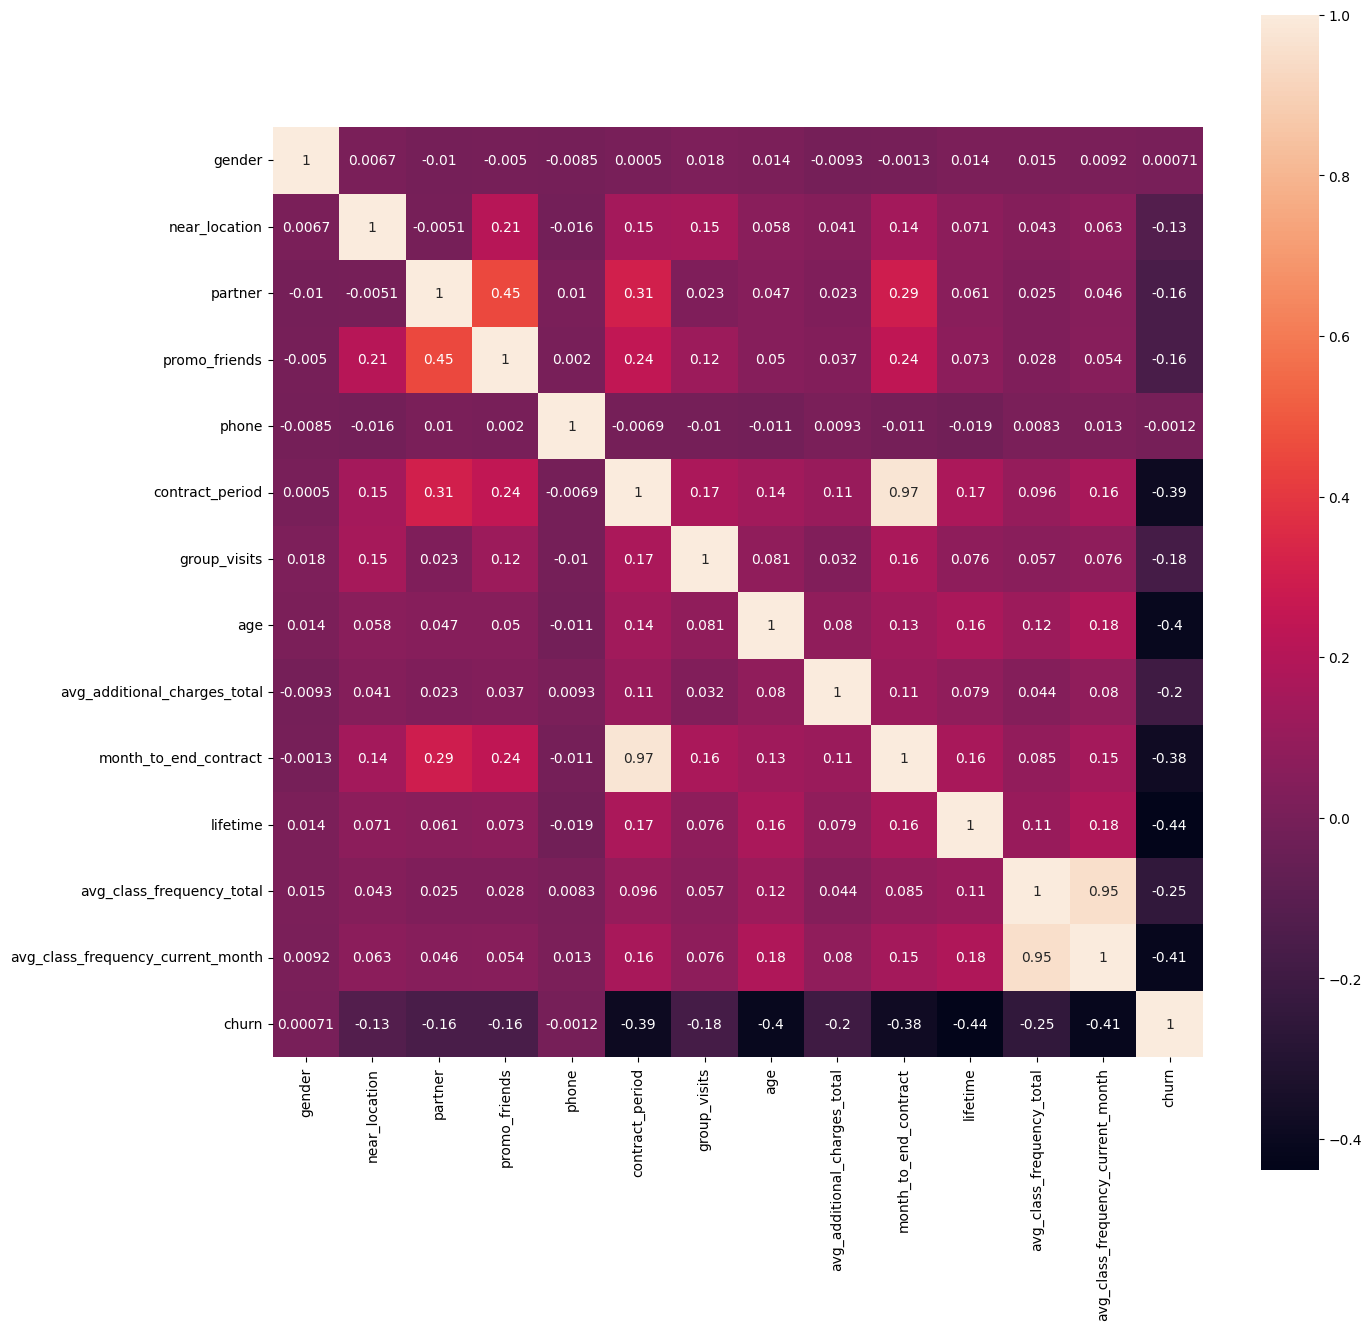

In [17]:
# Matriz de correlación
corr_m = gym_data.corr()

# Mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(corr_m, square=True, annot=True)
plt.show()

## 2.1. Construir un modelo para predecir la cancelación de usuarios

- 2.1.1. Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
- 2.1.2. Entrena el modelo en el set de entrenamiento con dos métodos: Regresión logística y Bosque aleatorio.
- 2.1.3. Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Separar los datos en entrenamiento y validación
entrenamiento, validacion = train_test_split(gym_data, test_size=0.25, random_state=42)

# Dividir características y variable objetivo
entrenamiento_caracteristicas = entrenamiento.drop(['churn'], axis=1)
entrenamiento_meta = entrenamiento['churn']

validacion_caracteristicas = validacion.drop(['churn'], axis=1)
validacion_meta = validacion['churn']

# Modelo de Regresión Logística
modelo_rl = LogisticRegression(max_iter=1000)
modelo_rl.fit(entrenamiento_caracteristicas, entrenamiento_meta)

prediccion_rl = modelo_rl.predict(validacion_caracteristicas)

print('Resultados del modelo de Regresión Logística:')
print('Exactitud:', accuracy_score(validacion_meta, prediccion_rl))
print('Precisión:', precision_score(validacion_meta, prediccion_rl))
print('Recuperación:', recall_score(validacion_meta, prediccion_rl))

# Modelo de Bosque Aleatorio
modelo_bosque = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_bosque.fit(entrenamiento_caracteristicas, entrenamiento_meta)

prediccion_bosque = modelo_bosque.predict(validacion_caracteristicas)

print('\nResultados del modelo de Bosque Aleatorio:')
print('Exactitud:', accuracy_score(validacion_meta, prediccion_bosque))
print('Precisión:', precision_score(validacion_meta, prediccion_bosque))
print('Recuperación:', recall_score(validacion_meta, prediccion_bosque))


Resultados del modelo de Regresión Logística:
Exactitud: 0.926
Precisión: 0.8841201716738197
Recuperación: 0.8142292490118577

Resultados del modelo de Bosque Aleatorio:
Exactitud: 0.916
Precisión: 0.8658008658008658
Recuperación: 0.7905138339920948


- En la interpretación de estos modelos, el modelo de Regresión Logística muestra un desempeño ligeramente mejor en las tres métricas: mayor exactitud, precisión y recuperación. Esto significa que, en este conjunto de datos, la regresión logística comete menos errores tanto en términos de falsos positivos como de falsos negativos en comparacón con el modelo de bosque aleatorio. Sin embargo, la diferencia es relativamente pequeña.

## 3.1. Crear clústeres de usuarios/as

#### 3.1.1 Estandariza los datos. Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

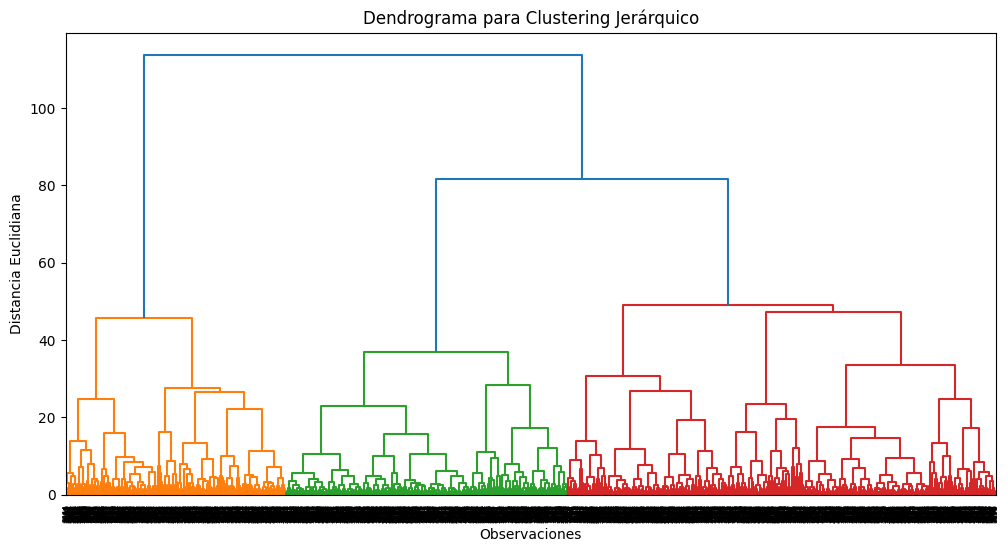

In [19]:
# Seleccionar características relevantes (excluyendo 'churn')
X = gym_data[[
    'contract_period', 'month_to_end_contract', 'lifetime',
    'avg_class_frequency_total', 'avg_class_frequency_current_month',
    'avg_additional_charges_total'
]]

# Estandarizar los datos (importante para clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear la matriz de distancias con el método de Ward
linked = linkage(X_scaled, method="ward")

# Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia Euclidiana')
plt.show()

- En el dendrograma, se ve que las uniones más altas suceden cerca de los valores 80 - 100 en el eje Y. Esto suele indicar que, si corto por encima de esa altura, fusionaría la mayoría de los datos en un solo cluster (porque el dendrograma se junta muy arriba).
- Aprox. a la altura de 65-70, se ve que se definen tres conjuntos (tres colores principales o tres grandes bloques de ramas).
- Al subir por encima de 70, se observa que dos de esos bloques se unen, reduciendo el número de clusters.
- Si trazamos una línea horizontal a una altura entre 60 y 70 (en este ejemplo, alrededor de 65), se verá que el dendrograma se “corta” en 3 grupos distintos.Esto significa que, en ese nivel de similitud, los datos se agrupan en tres clusters principales.


In [20]:
from scipy.cluster.hierarchy import fcluster

# Definir número de clusters (ajusta según el análisis)
num_clusters = 3  

# Crear etiquetas de cluster
gym_data['cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Revisar distribución de clusters
print(gym_data['cluster'].value_counts())


cluster
3    1841
2    1211
1     948
Name: count, dtype: int64


- El cluster 3 es el más grande, lo que sugiere que la mayoría de los datos tienen características similares.
- El cluster 1 es el más pequeño, lo que podría indicar un grupo más exclusivo o atípico.
- El cluster 2 es intermedio, lo que puede ser un grupo de transición entre los otros dos.


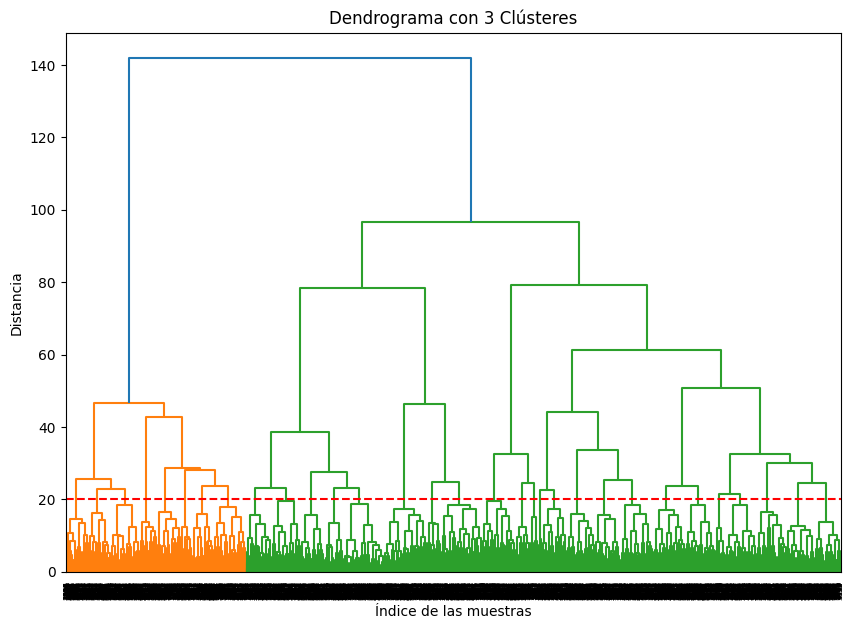

[3 1 3 ... 1 3 1]


In [21]:

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gym_data)  # Estandarizar los datos

# Calcular la matriz de distancias
dist_matrix = pdist(X_scaled, metric='euclidean')

# Crear la jerarquía
Z = sch.linkage(dist_matrix, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)

# Cortar el dendrograma en 3 clústeres
from scipy.cluster.hierarchy import fcluster
clust = fcluster(Z, t=3, criterion='maxclust')

# Añadir una línea para visualizar dónde se cortan los clústeres
plt.axhline(y=20, color='r', linestyle='--')  # Ajusta el valor de 'y' según sea necesario

plt.title('Dendrograma con 3 Clústeres')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

# Ahora 'clust' contiene los 3 clústeres
print(clust)

#### 3.1.1 Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [48]:
# Estandarizar los datos
sc = StandardScaler()
x_sc = sc.fit_transform(gym_data)

# Definir el modelo k_means con 5 clústeres y establecer random_state
km = KMeans(n_clusters=5,random_state=42)
# Predicer los clústeres para las observaciones (el algoritmo asigna un número de 0 a 4)
labels = km.fit_predict(x_sc)

# Almacena etiquetas de clúster en el campo de nuestro conjunto de datos
gym_data['cluster_km'] = labels

# Obtiene las estadísticas de los valores medios de las características por clúster
cluster_mean = gym_data.groupby(['cluster_km']).mean()

display(cluster_mean)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
cluster_km,,,,,,,,,,,,,,,
0,0.510345,0.767488,0.343842,0.176355,0.903448,1.503448,0.263054,26.929064,113.832277,1.454187,0.970443,1.438796,1.001818,0.998030,2.288670
1,0.554813,0.750000,0.094920,0.001337,0.894385,2.340909,0.403743,29.991979,157.228064,2.231283,4.770053,2.605213,2.610813,0.021390,2.994652
2,0.505285,0.931290,0.716702,0.477801,0.902748,12.000000,0.544397,29.808668,164.526369,10.919662,4.651163,2.001131,1.993791,0.023256,1.000000
3,0.523891,0.970990,0.865188,0.706485,0.897611,3.394198,0.447099,30.085324,155.877849,3.121160,5.066553,2.620272,2.621264,0.017065,2.984642
4,0.458156,0.838298,0.485106,0.266667,0.919149,2.988652,0.429787,29.987234,152.683963,2.818440,4.222695,0.962345,0.959272,0.000000,2.319149


#### 3.1.2 Mira los valores medios de característica para los clústeres.

Podemos observar que cluster 2 agrupa a clientes más comprometidos y de largo plazo, el cluster 0 agrupa a aquellos con baja permanencia y alta tasa de abandono, y los clusters intermedios muestran perfiles mixtos en cuanto al uso.

#### 3.1.3 ¿Hay algo que te llame la atención? Traza distribuciones de características para los clústeres. ¿Notas algo?

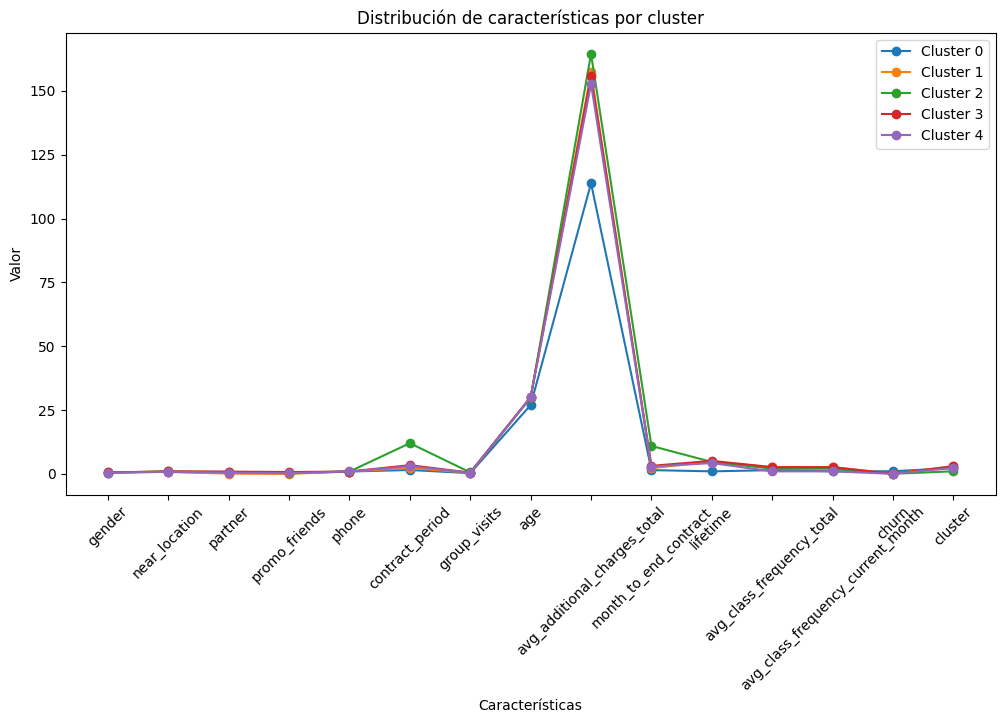

In [49]:
features = cluster_mean.columns  # Nombres de las características

plt.figure(figsize=(12, 6))
for idx, row in cluster_mean.iterrows():
    plt.plot(features, row, marker='o', label=f'Cluster {idx}')
plt.xticks(rotation=45)
plt.xlabel('Características')
plt.ylabel('Valor')
plt.title('Distribución de características por cluster')
plt.legend()
plt.show()



- Podemos observar que el cluster 0, el es que tiene un menor consumo en servicios dentro del gimnasio, el cual no alcanza a rebasar los 120, a diferencia de los otros clusters.
- Se observa tambien que el cluster 2 tiene aumento, debido a la cantidad de meses contratado para este grupo es el mayor (clientes con contratos a largo plazo).


#### 3.1.4 Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [46]:
# Obtiene las estadísticas de los valores medios de las características por clúster

cluster_mean = gym_data.groupby(['cluster_km']).mean()

# Filtrar columnas que nos interesa

cluster_mean_g = cluster_mean[['churn','cluster']]
display(cluster_mean_g)

,churn,cluster
cluster_km,,
0,0.998030,2.288670
1,0.017094,2.986325
2,0.000000,2.319149
3,0.021390,2.994652
4,0.023231,1.001056


- Cluster 0: 2.289729: churn = 0.998341 (prácticamente el 100% en cancelación)
- Cluster 1: 2.986325: churn = 0.018109 (aproximadamente 1.81% en cancelación)
- Cluster 2: 2.319149: churn = 0.000000 (0% en cancelación)
- Cluster 3: 2.994048: churn = 0.011905 (aproximadamente 1.19% en cancelación)
- Cluster 4: 1.001056: churn = 0.021164 (aproximadamente 2.1% en cancelación)

## 4.1 Conclusiones

- **Compromiso y duración del contrato:**
El cluster 2 destaca por tener un contract_period de 12.00 y un month_to_end_contract de 10.91, lo que sugiere clientes con contratos a largo plazo y un compromiso más firme. Además, registra los avg_additional_charges_total más altos, lo que indica un mayor consumo de servicios o productos adicionales.

- **Churn y tiempo de relación:**
El cluster 0 presenta un lifetime muy bajo (0.97) y un índice de churn casi total (0.998), lo que indica que se trata de clientes que han abandonado el servicio casi por completo o son muy recientes. Además, en este cluster se observa que la edad media es ligeramente menor (26.30 años), lo que podría asociarse a un perfil diferente.

- **Uso de servicios y promociones:**
El valor de promo_friends es muy alto en el cluster 3 en comparación con otros clusters, lo que sugiere una mayor tendencia a recomendar el servicio a amigos. Por otro lado, en el cluster 1 este valor es extremadamente bajo, evidenciando diferencias en la interacción o satisfacción con la promoción.

- **Otros aspectos:**
Los clusters 1, 2, 3 y 4 presentan valores intermedios en cuanto a contract_period, group_visits y avg_class_frequency (tanto total como en el mes actual), lo que sugiere un comportamiento más homogéneo en términos de uso del servicio, aunque con matices en variables específicas.

**Consideraciones:**
- Utilizar campañas de publicidad geolocalizada (anuncios en redes sociales, Google Ads, etc.) para destacar la proximidad y conveniencia del gimnasio, resaltando que el 76.16% de los clientes vive cerca.
- Organizar eventos locales, clases gratuitas o actividades comunitarias que inviten a la interacción y fidelicen a los vecinos
- Establecer alianzas con negocios locales para ofrecer promociones cruzadas y generar una red de apoyo comunitaria que refuerce la presencia del gimnasio en la zona. Una ventaja favorable es la cercania de los habitantes con el gimnasio, tenemos en esta un 76.16% de personas que viven cerca, lo que resulta una ventaja competitiva a la hora de realizar estretegias.